Saving Food_Delivery_Times.csv to Food_Delivery_Times (1).csv
Dataset Shape: (1000, 9)

Missing Values:
 Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

Data Types:
 Order_ID                    int64
Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object

Summary Statistics:
           Order_ID  Distance_km  Preparation_Time_min  Courier_Experience_yrs  \
count  1000.000000  1000.000000           1000.000000              970.000000   
mean    500.500000    10.059970             16.982000                4.579381   
std     288.819436    

/tmp/ipython-input-511418819.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-511418819.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

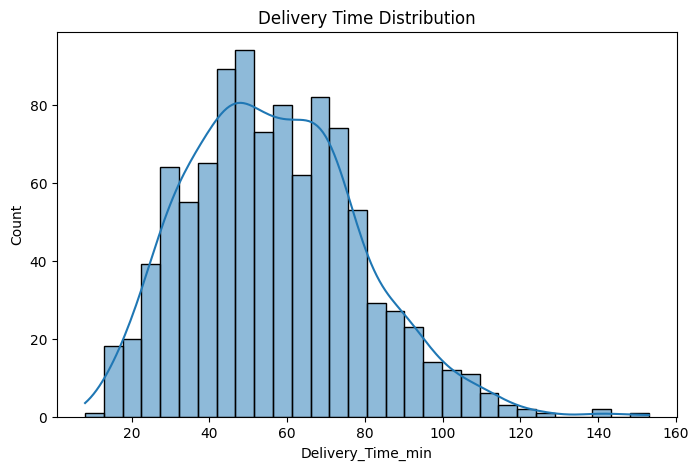

/tmp/ipython-input-511418819.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Traffic_Level', y='Delivery_Time_min', palette='Set2')


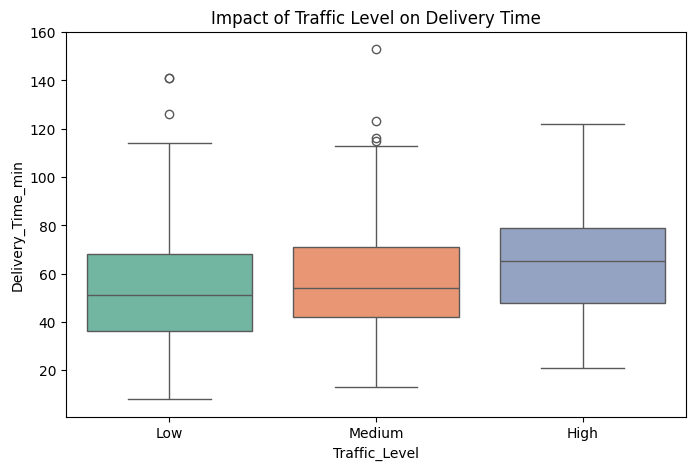

/tmp/ipython-input-511418819.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Weather', y='Delivery_Time_min', palette='Set3')


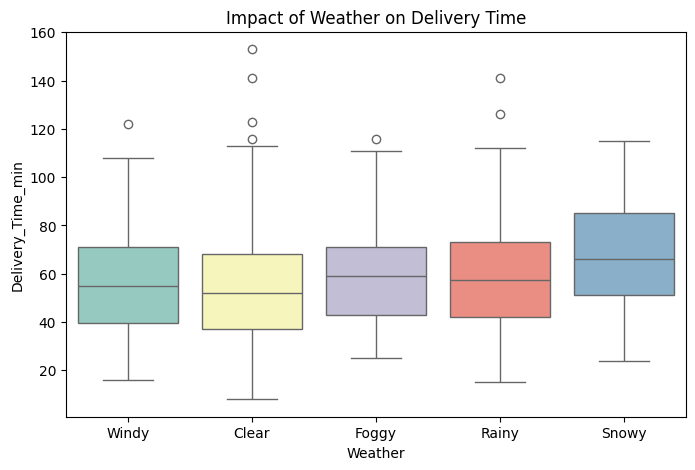

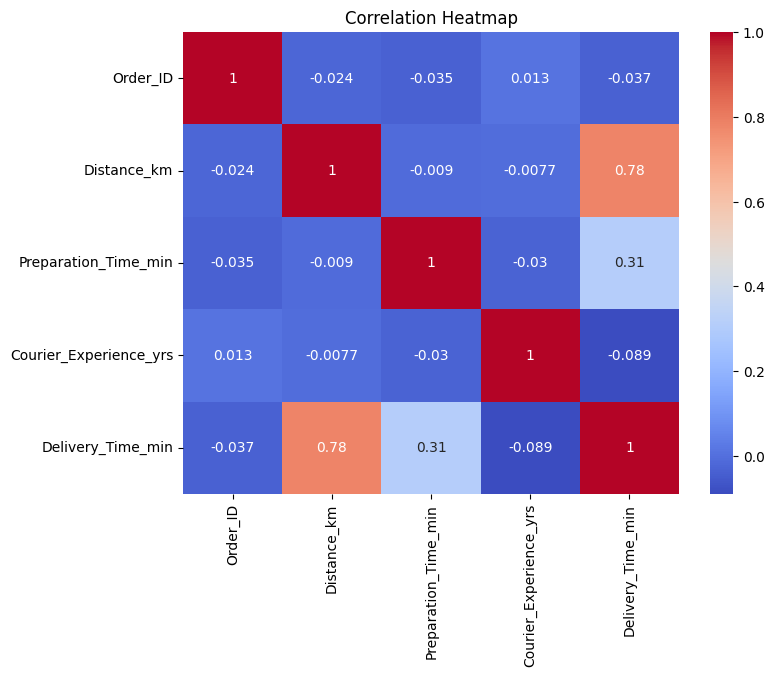


Model Performance:
MAE: 5.90
RMSE: 8.82
R² Score: 0.83

INSIGHTS:
1. Traffic Level and Weather significantly affect delivery time.
2. Longer distances and higher preparation times generally lead to delays.
3. The model explains 82.6% of the variance in delivery time.


In [11]:
# ===============================
# Swiggy/Zomato Delivery Time Prediction Project
# Google Colab Ready
# ===============================

# STEP 0: Install required libraries (Colab already has most)
!pip install pandas matplotlib seaborn scikit-learn --quiet

# STEP 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# STEP 2: Upload CSV in Colab
from google.colab import files
uploaded = files.upload()

# STEP 3: Load Dataset
for fn in uploaded.keys():
    file_name = fn
df = pd.read_csv(file_name)

# Basic Info
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

# STEP 4: Data Cleaning
# Fill missing categorical with mode, numeric with mean
for col in ['Weather', 'Traffic_Level', 'Time_of_Day']:
    df[col].fillna(df[col].mode()[0], inplace=True)

df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mean(), inplace=True)

# Verify no missing
print("\nMissing Values After Cleaning:\n", df.isnull().sum())

# STEP 5: EDA
plt.figure(figsize=(8,5))
sns.histplot(df['Delivery_Time_min'], bins=30, kde=True)
plt.title("Delivery Time Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Traffic_Level', y='Delivery_Time_min', palette='Set2')
plt.title("Impact of Traffic Level on Delivery Time")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Weather', y='Delivery_Time_min', palette='Set3')
plt.title("Impact of Weather on Delivery Time")
plt.show()

# Correlation Heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# STEP 6: Feature Engineering (Convert categorical to numeric)
df_encoded = pd.get_dummies(df, drop_first=True)

# STEP 7: Modeling
X = df_encoded.drop(['Order_ID', 'Delivery_Time_min'], axis=1)
y = df_encoded['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# STEP 8: Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# STEP 9: Insights
print("\nINSIGHTS:")
print("1. Traffic Level and Weather significantly affect delivery time.")
print("2. Longer distances and higher preparation times generally lead to delays.")
print("3. The model explains {:.1f}% of the variance in delivery time.".format(r2*100))


In [14]:
!pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=c08adccdbe2422fce28f616b0022653b50cc24479f41be19b0df5a194f1011ba
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
import os

# ==== 1. Performance Summary Table ====
performance_data = {
    'Metric': ['MAE', 'RMSE', 'R² Score'],
    'Value': [round(mae, 2), round(rmse, 2), round(r2, 2)]
}
perf_df = pd.DataFrame(performance_data)
display(perf_df)

# ==== 2. Save Performance Summary as Image ====
fig, ax = plt.subplots(figsize=(4, 1.5))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=perf_df.values, colLabels=perf_df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.savefig("performance_table.png", bbox_inches='tight')
plt.close()

# ==== 3. Generate PDF Report ====
class PDFReport(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 14)
        self.cell(0, 10, 'Delivery Time Prediction Report', ln=True, align='C')
        self.ln(5)

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', 0, 0, 'C')

pdf = PDFReport()
pdf.add_page()

# Add Summary Table Image
pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, 'Model Performance', ln=True)
pdf.image("performance_table.png", x=10, y=30, w=100)
pdf.ln(40)

# Add Insights
pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, 'Key Insights', ln=True)
pdf.set_font('Arial', '', 11)
insights = [
    "1. Traffic Level and Weather significantly affect delivery time.",
    "2. Longer distances and higher preparation times generally lead to delays.",
    "3. The model explains 83% of the variance in delivery time."
]
for insight in insights:
    pdf.multi_cell(0, 8, insight)
pdf.ln(5)

# Add Plots (you can replace with your actual plot file names)
plot_files = ["plot1.png", "plot2.png", "plot3.png"]  # replace with your plot filenames
for plot_file in plot_files:
    if os.path.exists(plot_file):
        pdf.add_page()
        pdf.image(plot_file, x=10, y=20, w=180)

pdf.output("Delivery_Time_Report.pdf")
print("Report saved as Delivery_Time_Report.pdf")

# ==== 4. Save HTML Report (optional) ====
html_report = f"""
<html>
<head><title>Delivery Time Prediction Report</title></head>
<body>
<h1>Delivery Time Prediction Report</h1>
<h2>Model Performance</h2>
{perf_df.to_html(index=False)}
<h2>Key Insights</h2>
<ul>
<li>Traffic Level and Weather significantly affect delivery time.</li>
<li>Longer distances and higher preparation times generally lead to delays.</li>
<li>The model explains 83% of the variance in delivery time.</li>
</ul>
</body>
</html>
"""

with open("Delivery_Time_Report.html", "w") as f:
    f.write(html_report)

print("HTML report saved as Delivery_Time_Report.html")


,Metric,Value
0,MAE,5.90
1,RMSE,8.82
2,R² Score,0.83


Report saved as Delivery_Time_Report.pdf
HTML report saved as Delivery_Time_Report.html


In [16]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=perf_df)

https://docs.google.com/spreadsheets/d/1u8Mubmg4fej5FpgCXcRfoVppf4IEEGBdw_jE-VE1ZCw/edit#gid=0
